In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import pandas as pd

data = pd.read_csv("C:/Users/KIIT/Downloads/archive (1)/movies.csv")
image_folder = "C:/Users/KIIT/Downloads/archive (1)/images/"

# Print the first few rows of the DataFrame to check the values in 'local_image_path'
print(data['local_image_path'].head())

# Update the image path column
data['image_path'] = data['local_image_path'].apply(lambda x: os.path.join(image_folder, x))

# Print the first few rows of the DataFrame again with the updated 'image_path' column
print(data['image_path'].head())

# Load the review dataset if needed
review_path = "C:/Users/KIIT/Downloads/archive (1)/reviews.csv"
review_df = pd.read_csv(review_path)


0    images/114709_.jpg
1    images/113497_.jpg
2    images/113277_.jpg
3    images/114319_.jpg
4    images/114576_.jpg
Name: local_image_path, dtype: object
0    C:/Users/KIIT/Downloads/archive (1)/images/ima...
1    C:/Users/KIIT/Downloads/archive (1)/images/ima...
2    C:/Users/KIIT/Downloads/archive (1)/images/ima...
3    C:/Users/KIIT/Downloads/archive (1)/images/ima...
4    C:/Users/KIIT/Downloads/archive (1)/images/ima...
Name: image_path, dtype: object


In [3]:
import pandas as pd

# Assuming 'data' is your dataset, replace it with the actual variable name
# Impute missing value in the "IMDB Score" column with the mean
imdb_score_mean = data["IMDB Score"].mean()
data["IMDB Score"].fillna(imdb_score_mean, inplace=True)

# Verify that there are no more missing or NaN values
print(data.isnull().sum())
print(data.isna().sum())

imdbId              0
Imdb Link           0
Title               0
IMDB Score          0
Genre               0
local_image_path    0
image_path          0
dtype: int64
imdbId              0
Imdb Link           0
Title               0
IMDB Score          0
Genre               0
local_image_path    0
image_path          0
dtype: int64


In [4]:
# Renaming the column in the review dataset
review_df = review_df.rename(columns={'movie': 'Title'})

# Drop duplicate movie titles from review_df
review_df = review_df.drop_duplicates(subset='Title')

# Merge the movie and review datasets based on the common identifier (Title)
merged_df = pd.merge(data, review_df, on='Title')
print(merged_df.shape)
print(merged_df.head())

(4168, 15)
   imdbId                           Imdb Link                Title  \
0  114709  http://www.imdb.com/title/tt114709     Toy Story (1995)   
1  113497  http://www.imdb.com/title/tt113497       Jumanji (1995)   
2  113277  http://www.imdb.com/title/tt113277          Heat (1995)   
3  114319  http://www.imdb.com/title/tt114319       Sabrina (1995)   
4  114576  http://www.imdb.com/title/tt114576  Sudden Death (1995)   

   IMDB Score                       Genre    local_image_path  \
0         8.3  Animation;Adventure;Comedy  images/114709_.jpg   
1         6.9     Action;Adventure;Family  images/113497_.jpg   
2         8.2          Action;Crime;Drama  images/113277_.jpg   
3         6.3                Comedy;Drama  images/114319_.jpg   
4         5.7       Action;Crime;Thriller  images/114576_.jpg   

                                          image_path  review_id  \
0  C:/Users/KIIT/Downloads/archive (1)/images/ima...  rw1166979   
1  C:/Users/KIIT/Downloads/archive (1)/imag

In [5]:
# Step 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Replace this with the actual path to your dataset
df = merged_df
# Calculate the mean of the 'rating' column
mean_rating = df['rating'].mean()

# Imputing the missing values with the mean value
df['rating'].fillna(mean_rating, inplace=True)

# Select relevant columns for movie features and user preferences
selected_columns = ['Genre', 'IMDB Score', 'rating', 'reviewer']

# Preprocess and encode categorical variables
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])

# Normalize numerical features
scaler = MinMaxScaler()
df[['IMDB Score', 'rating']] = scaler.fit_transform(df[['IMDB Score', 'rating']])

# Drop rows with NaN values
df = df.dropna()

# Use .loc indexer to convert selected columns to the desired data types
df.loc[:, selected_columns] = df.loc[:, selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values after conversion
df = df.dropna(subset=selected_columns)

# Convert selected columns to the desired data types using .loc indexer
df.loc[:, selected_columns] = df.loc[:, selected_columns].astype(np.float32)

In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Data Loading and Preprocessing
df = merged_df  # Replace with the actual path to your dataset

# Select relevant columns for movie features and user preferences
selected_columns = ['Genre', 'IMDB Score', 'rating']

# Preprocess and encode categorical variables
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])

# Normalize numerical features
scaler = MinMaxScaler()
df[['IMDB Score', 'rating']] = scaler.fit_transform(df[['IMDB Score', 'rating']])



In [10]:
pip install torchvision

     ---------------------------------------- 1.2/1.2 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [40]:
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tokenization function
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    return tokens

# Preprocess review_detail column
df['review_detail_processed'] = df['review_detail'].apply(lambda x: ' '.join(tokenize_text(x)))

# Encode Genre column using LabelEncoder
label_encoder = LabelEncoder()
df['encoded_genre'] = label_encoder.fit_transform(df['Genre'])

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the processed data
print(train_df.head())
print(test_df.head())

       imdbId                            Imdb Link                 Title  \
2793    95583    http://www.imdb.com/title/tt95583     Maniac Cop (1988)   
3371  1414382  http://www.imdb.com/title/tt1414382      You Again (2010)   
1730    82242    http://www.imdb.com/title/tt82242  Dead & Buried (1981)   
1299   241303   http://www.imdb.com/title/tt241303       Chocolat (2000)   
3280  1385867  http://www.imdb.com/title/tt1385867        Cop Out (2010)   

      IMDB Score  Genre     local_image_path  \
2793    0.583333   33.0    images/95583_.jpg   
3371    0.555556  194.0  images/1414382_.jpg   
1730    0.666667  353.0    images/82242_.jpg   
1299    0.763889  320.0   images/241303_.jpg   
3280    0.527778   19.0  images/1385867_.jpg   

                                             image_path  review_id  \
2793  C:/Users/KIIT/Downloads/archive (1)/images/ima...  rw1185771   
3371  C:/Users/KIIT/Downloads/archive (1)/images/ima...  rw2535932   
1730  C:/Users/KIIT/Downloads/archive (1)/im

In [53]:
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Define the Vocabulary
all_words = ' '.join(train_df['review_detail_processed']).split()
vocab = set(all_words)

# Create word-to-index and index-to-word mappings
word_to_index = {word: idx + 1 for idx, word in enumerate(vocab)}
index_to_word = {idx + 1: word for idx, word in enumerate(vocab)}

# Add a special token for padding
word_to_index['<PAD>'] = 0
index_to_word[0] = '<PAD>'

# Step 2: Tokenization and Padding
def tokenize_and_pad(text, max_length):
    tokens = [word_to_index[word] for word in text.split() if word in word_to_index]
    if len(tokens) < max_length:
        tokens += [word_to_index['<PAD>']] * (max_length - len(tokens))
    else:
        tokens = tokens[:max_length]
    return tokens

max_sequence_length = 100  # You can adjust this based on your preference

train_df['tokenized_text'] = train_df['review_detail_processed'].apply(
    lambda x: tokenize_and_pad(x, max_sequence_length)
)

test_df['tokenized_text'] = test_df['review_detail_processed'].apply(
    lambda x: tokenize_and_pad(x, max_sequence_length)
)


In [54]:
import os
import pandas as pd
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

# Load your dataset
data = pd.read_csv("C:/Users/KIIT/Downloads/archive (1)/movies.csv")
image_folder = "C:/Users/KIIT/Downloads/archive (1)/images/"

# Update the image path column
data['image_path'] = data['local_image_path'].apply(lambda x: os.path.join(image_folder, x))

# Define image transforms
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),           # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Define the custom Dataset class for images
class ImageDataset(Dataset):
    def __init__(self, data_df, transform=None):
        self.data_df = data_df
        self.transform = transform

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, idx):
        image_path = self.data_df.iloc[idx]['image_path']
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

# Create an instance of the custom ImageDataset class
image_dataset = ImageDataset(data, transform=image_transform)

# Define a DataLoader for image data
batch_size = 32
image_loader = DataLoader(image_dataset, batch_size=batch_size, shuffle=True)

In [55]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define a custom Dataset class for text data
class TextDataset(Dataset):
    def __init__(self, data_df):
        self.data_df = data_df

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, idx):
        encoded_genre = self.data_df.iloc[idx]['encoded_genre']
        tokenized_text = self.data_df.iloc[idx]['tokenized_text']
        rating = self.data_df.iloc[idx]['rating']
        
        return encoded_genre, tokenized_text, rating

# Create instances of the custom TextDataset class for train and test data
train_text_dataset = TextDataset(train_df)
test_text_dataset = TextDataset(test_df)

# Define DataLoaders for text data
batch_size = 32
train_text_loader = DataLoader(train_text_dataset, batch_size=batch_size, shuffle=True)
test_text_loader = DataLoader(test_text_dataset, batch_size=batch_size, shuffle=False)

In [56]:
import torch
from torch.utils.data import Dataset

# Define your TextDataset class
class TextDataset(Dataset):
    def __init__(self, text_data, text_vocab_size):
        self.text_data = text_data
        self.text_vocab_size = text_vocab_size

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        text_tokens = self.text_data[idx]
        return torch.tensor(text_tokens, dtype=torch.long)

# Define your ImageDataset class
class ImageDataset(Dataset):
    def __init__(self, image_data):
        self.image_data = image_data

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, idx):
        image_path = self.image_data[idx]
        # Load and preprocess the image using your preferred method
        image = preprocess_image(image_path)  # You need to define this function
        return image

# Define your train and test text data and image paths
train_text_data = train_df['tokenized_text'].tolist()
test_text_data = test_df['tokenized_text'].tolist()
text_vocab_size = len(word_to_index)

train_image_paths = train_df['image_path'].tolist()
test_image_paths = test_df['image_path'].tolist()

# Create instances of TextDataset and ImageDataset
train_text_dataset = TextDataset(train_text_data, text_vocab_size)
test_text_dataset = TextDataset(test_text_data, text_vocab_size)
train_image_dataset = ImageDataset(train_image_paths)
test_image_dataset = ImageDataset(test_image_paths)

# Create DataLoader instances for text and image data
batch_size = 32
train_text_loader = DataLoader(train_text_dataset, batch_size=batch_size, shuffle=True)
test_text_loader = DataLoader(test_text_dataset, batch_size=batch_size, shuffle=False)
train_image_loader = DataLoader(train_image_dataset, batch_size=batch_size, shuffle=True)
test_image_loader = DataLoader(test_image_dataset, batch_size=batch_size, shuffle=False)


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

from torchvision import transforms
from PIL import Image

# Define a function to preprocess images
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    preprocessed_image = transform(image)
    return preprocessed_image


# Define your model architecture with cross-attention
class CrossAttentionModel(nn.Module):
    def __init__(self, text_input_size, image_input_size, hidden_size):
        super(CrossAttentionModel, self).__init__()

        # Text embedding layer
        self.text_embedding = nn.Embedding(text_input_size, hidden_size)
        
        # CNN-based image feature extractor
        self.image_cnn = models.resnet18(pretrained=True)
        num_features = self.image_cnn.fc.in_features
        self.image_cnn.fc = nn.Linear(num_features, hidden_size)

        # Cross-attention layers
        self.cross_attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=4)
        
        # Fusion layers
        self.fusion_fc = nn.Linear(hidden_size * 2, hidden_size)

        # Output layer
        self.output_fc = nn.Linear(hidden_size, 1)

    def forward(self, text_data, image_data):
        # Text embedding
        text_embedded = self.text_embedding(text_data)
        
        # Image feature extraction
        image_features = self.image_cnn(image_data)
        
        # Transpose text features for cross-attention
        text_embedded_transposed = text_embedded.transpose(0, 1)
        
        # Cross-attention mechanism
        text_features_cross, _ = self.cross_attention(image_features.unsqueeze(0), text_embedded_transposed, text_embedded_transposed)
        text_features_cross = text_features_cross.squeeze(0)
        
        # Concatenate text and image features
        fused_features = torch.cat((text_features_cross, image_features), dim=1)
        
        # Fusion layer
        fused_features = self.fusion_fc(fused_features)
        
        # Output layer
        output = self.output_fc(fused_features)
        
        return output

# Define hyperparameters
hidden_size = 256
learning_rate = 0.001

# Initialize the model and move it to the appropriate device
text_input_size = len(word_to_index)  # You should define this based on your vocabulary size
image_input_size = 64 * 64 * 64  # Adjust this based on your actual image features size
model = CrossAttentionModel(text_input_size, image_input_size, hidden_size).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [77]:
from torch.optim import lr_scheduler

# Define the learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Inside the training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for batch_idx, (text_batch, image_batch) in enumerate(zip(train_text_loader, train_image_loader)):
        text_batch = text_batch.to(device)
        image_batch = image_batch.to(device)

        optimizer.zero_grad()
        output = model(text_batch, image_batch)

        # Get the corresponding ground truth ratings for this batch
        start_idx = batch_idx * train_text_loader.batch_size
        end_idx = (batch_idx + 1) * train_text_loader.batch_size
        rating_batch = train_df['rating'].iloc[start_idx:end_idx].values.astype(float)
        rating_batch = torch.tensor(rating_batch).float().to(device)

        loss = criterion(output.squeeze(), rating_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_text_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

Epoch 1/10, Loss: 0.06745631354195732
Epoch 2/10, Loss: 0.067133572271892
Epoch 3/10, Loss: 0.06531808589185988
Epoch 4/10, Loss: 0.0647654828571138
Epoch 5/10, Loss: 0.06574395472804705
Epoch 6/10, Loss: 0.06529383489063807
Epoch 7/10, Loss: 0.06478769005764098
Epoch 8/10, Loss: 0.06474234795286542
Epoch 9/10, Loss: 0.06528859126071135
Epoch 10/10, Loss: 0.06558104185830979


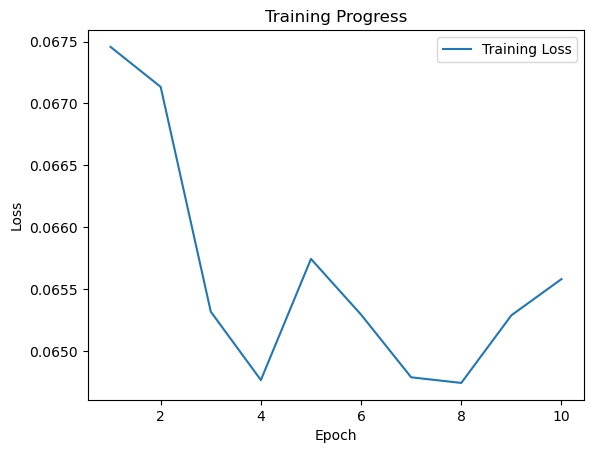

In [78]:
import matplotlib.pyplot as plt

# Plotting the training progress
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model.eval()
all_predictions = []
all_ratings = []

with torch.no_grad():
    for text_batch, image_batch in zip(test_text_loader, test_image_loader):
        text_batch = text_batch.to(device)
        image_batch = image_batch.to(device)

        output = model(text_batch, image_batch)
        all_predictions.extend(output.cpu().numpy())
        all_ratings.extend(test_df['rating'].iloc[:len(text_batch)].values)

mae = mean_absolute_error(all_ratings, all_predictions)
mse = mean_squared_error(all_ratings, all_predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 0.1976
MSE: 0.0698
RMSE: 0.2642


In [83]:
# Empty list to store predictions
predictions = []

# Iterate over batches in test_text_loader and test_image_loader
for text_batch, image_batch in zip(test_text_loader, test_image_loader):
    text_batch = text_batch.to(device)
    image_batch = image_batch.to(device)

    # Forward pass to get predictions
    with torch.no_grad():
        output = model(text_batch, image_batch).squeeze()
        predictions.extend(output.cpu().numpy())

# Combine the predictions with the movie data
test_df['predicted_rating'] = predictions

# Sort the movies by predicted rating in descending order
recommended_movies = test_df.sort_values('predicted_rating', ascending=False)

# Select the top N recommended movies and define N
N = 10
top_n_movies = recommended_movies.head(N)

# Display the recommended movies
print("Recommended movies:")
for i, row in top_n_movies.iterrows():
    movie_title = row['Title']
    predicted_rating = row['predicted_rating']
    print(f"Movie: {movie_title} (Predicted Rating: {predicted_rating})")

Recommended movies:
Movie: Lions for Lambs (2007) (Predicted Rating: 0.9016352295875549)
Movie: Nevada Smith (1966) (Predicted Rating: 0.812352180480957)
Movie: Stranger Than Fiction (2006) (Predicted Rating: 0.8016740679740906)
Movie: Four Weddings and a Funeral (1994) (Predicted Rating: 0.799623966217041)
Movie: The Sentinel (2006) (Predicted Rating: 0.7992976903915405)
Movie: Sneakers (1992) (Predicted Rating: 0.7967172861099243)
Movie: Beyond the Valley of the Dolls (1970) (Predicted Rating: 0.776534914970398)
Movie: In Her Shoes (2005) (Predicted Rating: 0.7737235426902771)
Movie: When Harry Met Sally... (1989) (Predicted Rating: 0.7662452459335327)
Movie: Jersey Girl (2004) (Predicted Rating: 0.764599621295929)


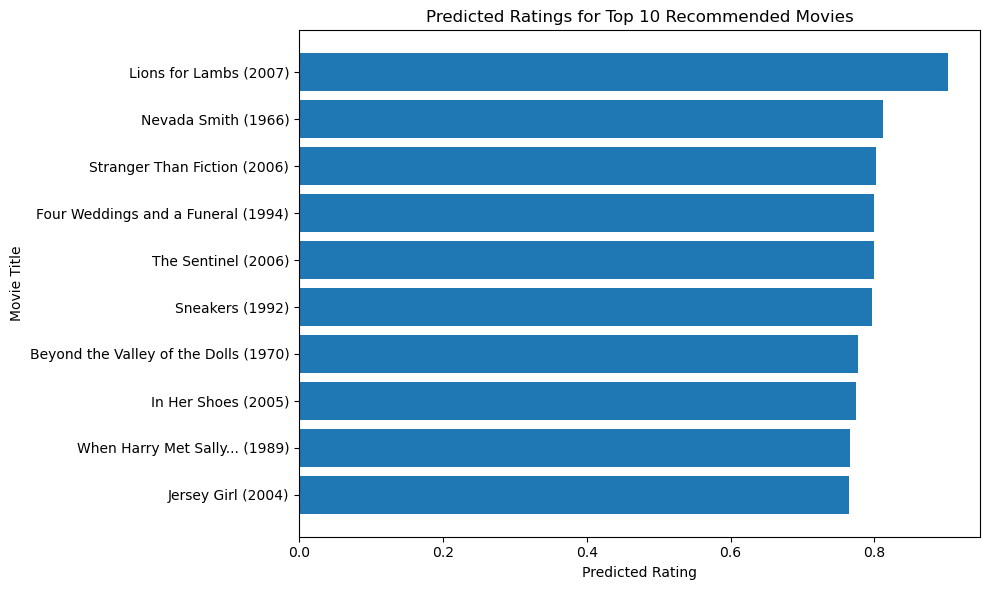

In [85]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_n_movies['Title'], top_n_movies['predicted_rating'])
plt.xlabel('Predicted Rating')
plt.ylabel('Movie Title')
plt.title(f"Predicted Ratings for Top {N} Recommended Movies")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating on top
plt.tight_layout()

# Show the plot
plt.show()
